__Ejercicio 1:__ ¿Como podemos evaluar funciones en matrices?
__Hint:__ ¿que operaciones sabemos que estan bien definidas sobre matrices?

Se evaluan con su serie de Taylor; las operaciones que sabemos están definidas sobre matrices son la suma y producto entre matrices y el producto por un escalar.

__Ejercicio 2:__ ¿Como se define una matriz simétrica?

Una matriz cuadrada igual a su transpuesta.

__Ejercicio 3:__ ¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?

Diagonalizándola. 
Sea $A$ una matriz cuadrada y $P$ la matriz de eigenvectores 
$$AP=PD$$
$$P^{-1}AP=D$$
Donde $D$ será simétrica

__Ejercicio 4:__ Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice:
$$A=\left(\begin{array}{cc} -1 & 1\\ -1 & -1 \end{array} \right).$$
* Grafique la trayectoria en el espacio de fase.
* Recuerde que $\vec x(t) = e^{A t}\vec x_0$, y necesitamos graficar la trayectoria $\vec x(t)$ en el espacio de fase.

In [6]:
A=[-1 1; -1 -1]

2×2 Array{Int64,2}:
 -1   1
 -1  -1

In [8]:
valores=eigvals(A)

2-element Array{Complex{Float64},1}:
 -1.0+1.0im
 -1.0-1.0im

In [9]:
vectores=eigvecs(A)

2×2 Array{Complex{Float64},2}:
 0.707107+0.0im       0.707107-0.0im     
      0.0+0.707107im       0.0-0.707107im

In [10]:
diag=diagm(eigvals(A))

2×2 Array{Complex{Float64},2}:
 -1.0+1.0im   0.0+0.0im
  0.0+0.0im  -1.0-1.0im

In [13]:
m(t,x0)=vectores*diagm(exp.(valores*t))*inv(vectores)*x0

m (generic function with 1 method)

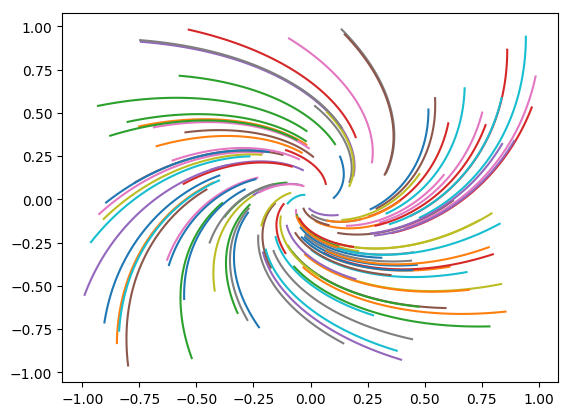

In [16]:
using PyPlot
for i in 1:100  
    l=linspace(0,1,100)
    X=[]
    x0=[2*rand()-1,2*rand()-1]
    for k in 1:length(l)
        n=m(l[k],x0)   
        push!(X,n)
    end
    listx=map(x->x[1],real(X))  
    listv=map(x->x[2],real(X))
    plot(listx,listv)
end